In [37]:
import pandas as pd
#pd.options.display.max_rows = 20000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import gensim 
import nltk
import re , string #emoji, Stemmer, functools, operator
#import re , emoji, Stemmer, functools, operator, string
nltk.download('stopwords')
from nltk.corpus import stopwords
stop  = stopwords.words('arabic')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler ,MaxAbsScaler
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV 
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Allawi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# loading Data
DATA_PATH = 'AJGT.xlsx'
df = pd.read_excel(DATA_PATH)
df.head(20)

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative
5,6,ابشرك فيه تحسن ولله الحمد باذن الله يرجع قريبا,Positive
6,7,ابو الشباب راعي العود ليش ماوزنه في البيت غباء,Negative
7,8,ابو معيتق قطع اوتار العود وقال السلام عليكم,Negative
8,9,اتحزن فان الله يدافع عنك والملائكه تستغفر لك و...,Positive
9,10,اترك ما تهوى لاجل من تخشى,Positive


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

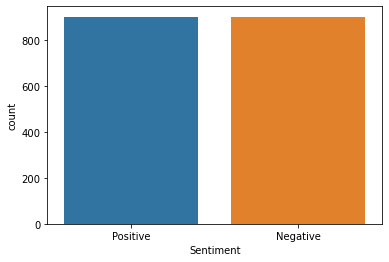

In [5]:
# Data Expolaration 
import seaborn as sns
sns.countplot(x='Sentiment', data=df)

In [6]:
#Convert to Data Frame to do operations
Data=pd.DataFrame(df)
Data.head()

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative


In [7]:
Data.Feed

0        اربد فيها جامعات اكثر من عمان ... وفيها قد عم...
1        الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...
2                                 كله رائع بجد ربنا يكرمك
3                                      لسانك قذر يا قمامه
4       ​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...
                              ...                        
1795                                       يلعن شرف خواتك
1796                                       يلعنك نذل وكلب
1797    يمتاز الاردن بتنوع السياحه فيه فتنقسم السياحه ...
1798                            ينور عليك ويكثر من امثالك
1799                                    يهدي الله من يشاء
Name: Feed, Length: 1800, dtype: object

In [8]:
# Drop ID
Data=Data.drop('ID',axis=1)

In [9]:
#Rename Columns
Data=Data.rename(columns ={'Feed':'text','Sentiment':'label'})

In [10]:
# convert the categorical values to numeric
label_mapping = {"Positive": 1, "Negative":-1 }
Data["label"] = Data["label"].map(label_mapping)

In [11]:
#TweetS Preprocessing 


punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ#''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words('arabic')

Arabic_diacritics = re.compile("""  ّ    | # Shadda  َ    | # Fatha  ً    | # Tanwin Fath  ُ    | # Damma ٌ    | # Tanwin Damm  ِ    | # Kasra  ٍ    | # Tanwin Kasr
                                    ْ    | # Sukun ـ     # Tatwil/Kashida """, re.VERBOSE)

def Cleaning  (text):
   #remove punctuations
    Punc_Remov = str.maketrans('', '', punctuations)
    text = text.translate(Punc_Remov)   
    # remove Tashkeel
    Text = re.sub(Arabic_diacritics, '', text)
    #Remove longation normalize_arabic letter
    text = re.sub("[إأآا]", "ا", Text)
    text = re.sub("ى", "ي", Text)
    text = re.sub("ؤ", "ء", Text)
    text = re.sub("ئ", "ء", Text)
    text = re.sub("ة", "ه", Text)
    text = re.sub("گ", "ك", Text)
    
    text = ''.join(word for word in text.split() if word not in stop_words)

    return Text
processed_tweets = Data['text'].apply(Cleaning)
processed_tweets

0        اربد فيها جامعات اكثر من عمان  وفيها قد عمان ...
1        الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...
2                                 كله رائع بجد ربنا يكرمك
3                                      لسانك قذر يا قمامه
4       ​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...
                              ...                        
1795                                       يلعن شرف خواتك
1796                                       يلعنك نذل وكلب
1797    يمتاز الاردن بتنوع السياحه فيه فتنقسم السياحه ...
1798                            ينور عليك ويكثر من امثالك
1799                                    يهدي الله من يشاء
Name: text, Length: 1800, dtype: object

In [12]:
 # Also Remove any Emotions & Links & Mentions & Hashtag 
processed_tweets=processed_tweets.map(lambda text: re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+', ' ', text).strip())

In [13]:
#convert text to numbers and do features extraction
Vectorizer = TfidfVectorizer(max_features=2000, min_df=5,max_df=0.7)# analyzer='word'
#(ngram_range=(1,8),  analyzer='char' ,  max_df=0.999999999, min_df=1, sublinear_tf=True, use_idf=True, norm='l2' )


In [14]:
X =Vectorizer.fit_transform(processed_tweets).toarray()

In [15]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.85170318, 0.        ,
        0.        ]])

In [16]:
# Assign Data Lable as Y
Y = Data['label']

In [17]:
#Split Data 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,random_state=100) 


In [18]:
#clf=SVC(kernel='rbf')
estimators = { SVC() : {'C':[0.1, 1, 10, 100], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] ,
                        'degree' : [0.1, 1, 10, 100]}, KNeighborsClassifier():{'n_neighbors': [2,4,5]}, 
               DecisionTreeClassifier():{'max_depth':[5,6,8,9], 'random_state':[40]}}
              #LogisticRegression():{'penalty':[l1', 'l2', 'elasticnet'], 'C': [0.01, 0.1, 1, 10, 100]},
              # RandomForestClassifier():{'rand.nEst':[10, 50, 100],'randmaxfeat':['sqrt', 'log2']}}

SVC acuracy = 80.8081 % , and precision score = 83.6177 % 
 Best parameters are {'C': 1, 'degree': 0.1, 'kernel': 'rbf'} 

              precision    recall  f1-score   support

          -1      0.781     0.830     0.805       283
           1      0.836     0.788     0.811       311

    accuracy                          0.808       594
   macro avg      0.808     0.809     0.808       594
weighted avg      0.810     0.808     0.808       594



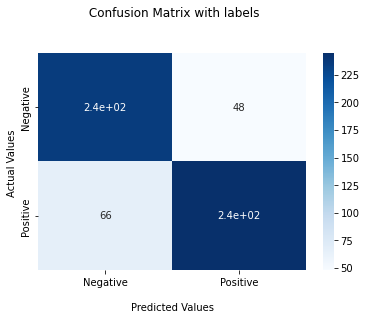

KNeighborsClassifier acuracy = 63.8047 % , and precision score = 90.0 % 
 Best parameters are {'n_neighbors': 2} 

              precision    recall  f1-score   support

          -1      0.572     0.958     0.716       283
           1      0.900     0.347     0.501       311

    accuracy                          0.638       594
   macro avg      0.736     0.652     0.609       594
weighted avg      0.744     0.638     0.604       594



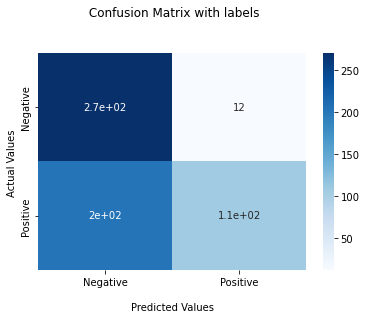

DecisionTreeClassifier acuracy = 72.0539 % , and precision score = 85.0242 % 
 Best parameters are {'max_depth': 8, 'random_state': 40} 

              precision    recall  f1-score   support

          -1      0.651     0.890     0.752       283
           1      0.850     0.566     0.680       311

    accuracy                          0.721       594
   macro avg      0.751     0.728     0.716       594
weighted avg      0.755     0.721     0.714       594



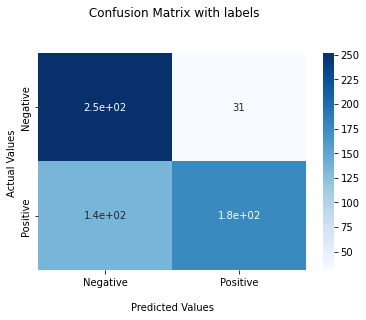

In [47]:
for clf , hyper_params in estimators.items():
    Model = GridSearchCV( clf, hyper_params, cv=3)
   # rand = RandomizedSearchCV(clf , hyper_params, random_state = 3)
    Model.fit(X_train,y_train)
    predics = Model.predict(X_test)
    print("{} acuracy = {} % , and precision score = {} % \n Best parameters are {} \n"
          .format(str(clf).replace('()',''),round(accuracy_score(y_test, predics) *100,4),
                  round(precision_score(y_test, predics)*100,4),Model.best_params_))
    print (classification_report(y_test, predics,digits=3))
    confus_Model= confusion_matrix(y_test, predics)
    ax = sns.heatmap(confus_Model, annot=True, cmap='Blues')
    ax.set_title(' Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])
## Display the visualization of the Confusion Matrix.
    plt.show()